In [19]:
import pandas as pd
import numpy as np
import pickle

import shap
import matplotlib.pyplot as plt

### Import Data

In [15]:
df = pd.read_csv("data/data_processed/test_processed.csv")
df.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age Class,Title,Is Alone,Total Peers
0,3,male,0,0,7.8292,Q,old adult,Mr,True,0
1,3,female,1,0,7.0000,S,old adult,Mrs,False,1
2,2,male,0,0,9.6875,Q,retirement,Mr,True,0
3,3,male,0,0,8.6625,S,middle adult,Mr,True,0
4,3,female,1,1,12.2875,S,young adult,Mrs,False,2


In [53]:
# submission

df_submission = pd.read_csv("data/test.csv")
df_submission = df_submission[["PassengerId"]]
df_submission

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


### Submission Model : Logistic Regression

In [54]:
df_submission_lr = df_submission.copy()

loaded_model_lr = pickle.load(open('model_logistic_regression.pkl', 'rb'))
df_submission_lr['Survived'] = loaded_model_lr.predict(df)
df_submission_lr.to_csv("titanic_logistic_reg.csv", index=False)
df_submission_lr

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### Submission Model : Gradient Boosting

In [56]:
df_submission_gb = df_submission.copy()

loaded_model_gb = pickle.load(open('model_gradient_boost.pkl', 'rb'))
df_submission_gb['Survived'] = loaded_model_gb.predict(df)
df_submission_gb.to_csv("titanic_gradient_boost.csv", index=False)
df_submission_gb

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
### Shap GB
loaded_model_gb = pickle.load(open('model_gradient_boost.pkl', 'rb'))

num_cols = ['Fare', 'SibSp', 'Parch', 'Total Peers']
ohe_cols = ['Sex', 'Embarked', 'Title', 'Is Alone']
ordinal_cols = ['Pclass', 'Age Class']

preprocessor = loaded_model_gb.named_steps['preprocessor']
new_cat_cols = preprocessor.named_transformers_['ohe_enc'].named_steps['encoder'].get_feature_names_out(ohe_cols)
all_cols = np.concatenate([num_cols, new_cat_cols,  ordinal_cols])

In [6]:
all_cols

array(['Fare', 'SibSp', 'Parch', 'Total Peers', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
       'Is Alone_False', 'Is Alone_True', 'Pclass', 'Age Class'],
      dtype=object)

In [16]:
explainer = shap.Explainer(loaded_model_gb['xgb'], feature_names=all_cols)
observations = preprocessor.transform(df)
shap_values = explainer(observations)

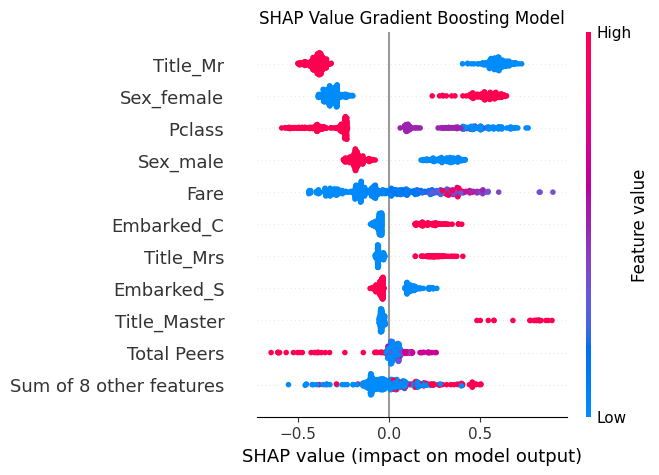

In [23]:
shap.plots.beeswarm(shap_values, show=False, max_display=11)
plt.gcf().set_size_inches(5,5)
plt.title("SHAP Value Gradient Boosting Model")
plt.show()